In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp, quad   #The imports used in this lab 

# Constants with their respect units 
G = 6.6743e-11  # Gravitational Constant (m^3/kg/s^2)
g= 9.81  # Gravitational Acceleration at the surface (m/s^2)
M_earth = 5.972e24  # Mass of the Earth (kg)
R_earth = 6378.1e3  # Radius of the Earth (m)
Omega = 7.272e-5  # Earth's rotation rate at the equator (rad/s)
mine_depth = -4000  # Depth of the mine (m)


In [3]:
#Problem 1. part 1, and 2

##Asumming no drag, the second derivative of y would be gravity => dVy/dt=-g  
#This is the simple algebraic equation
def freefall_time(h):
    return np.sqrt(2*h/g) 

#Free fall for h=4000


answer_part_a= freefall_time(abs(mine_depth))

answer_part_a  #Gives out the free fall time 
print(answer_part_a)
#diferential equation for a falling object 
def falling_object(t,S,a,z):   #a,z are the constats depending on the object and its mass, given by the lab2 file 
    Y,Vy=S
    dYdt= Vy
    dVydt=-g-a*(Vy**z)
    return [dYdt,dVydt] 


28.55686245854129


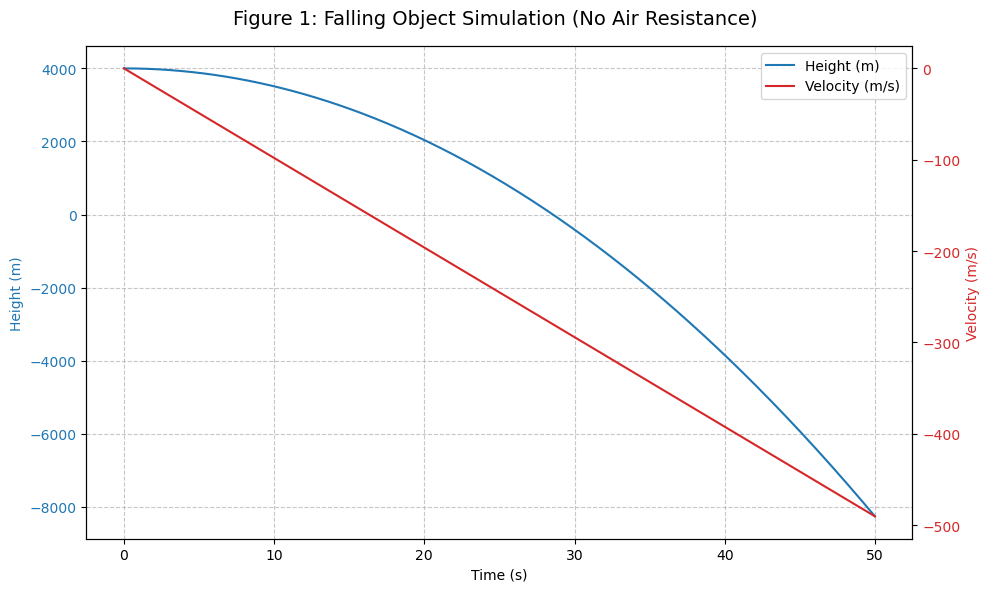

In [56]:
#Problem 1, Part 3
#The 2nd order has already been reduced in last code cell, now we use this function 

#Initial conditions and constants
g = 9.81       # gravity (m/s²)
alpha = 0      # no air resistance
lamb = 2       # power of velocity (unused here)
t_span = (0, 50)
t_eval = np.linspace(0, 50, 400)
S_0 = [4000, 0]   # initial position and velocity
#Our function
def falling_object(t, S, a, z):
    Y, Vy = S
    dYdt = Vy
    dVydt = -g - a * (Vy**z)
    return [dYdt, dVydt]
#Solve the coupled ODE.
first_answer = solve_ivp(falling_object, t_span, S_0, t_eval=t_eval, args=(alpha, lamb))
time = first_answer.t
height = first_answer.y[0]
velocity = first_answer.y[1]

# Figure 1: Height and Velocity vs Time using twin axes
fig, ax1 = plt.subplots(figsize=(10, 6))
fig.suptitle("Figure 1: Falling Object Simulation (No Air Resistance)", fontsize=14)

# Height on left y-axis
ax1.plot(time, height, color="tab:blue", label="Height (m)")
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("Height (m)", color="tab:blue")
ax1.tick_params(axis="y", labelcolor="tab:blue")


# Velocity on right y-axis
ax2 = ax1.twinx()
ax2.plot(time, velocity, color="tab:red", label="Velocity (m/s)")
ax2.set_ylabel("Velocity (m/s)", color="tab:red")
ax2.tick_params(axis="y", labelcolor="tab:red")

# Combine legends from both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc="upper right")

# Grid and layout
ax1.grid(True, linestyle="--", alpha=0.7)
fig.tight_layout()
plt.show()




Impact detected at t = 28.56 seconds
Height at impact: 0.00 m, Velocity at impact: -280.14 m/s


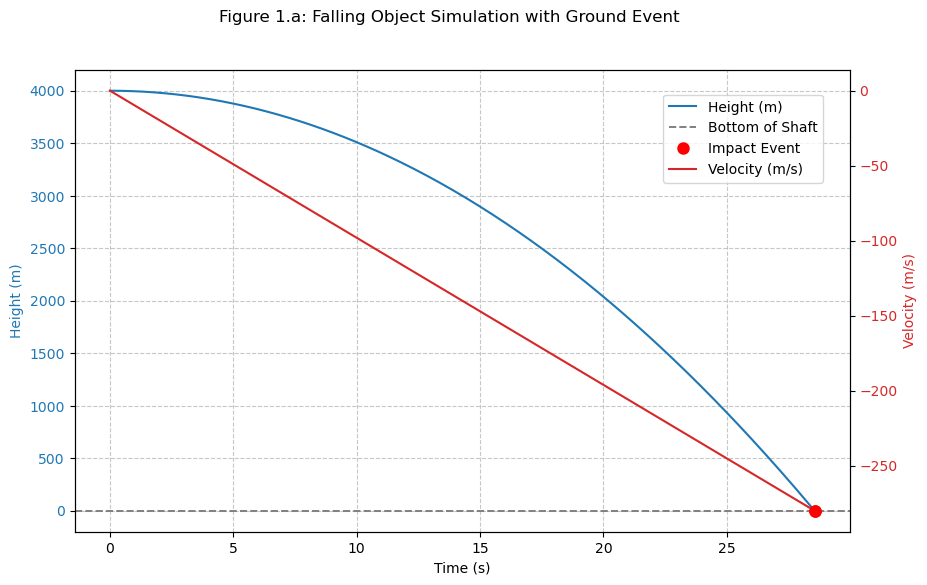

In [92]:
#Problem 1:Part 4

# Define constants
g = 9.81  # Gravitational acceleration (m/s^2)


# Define the falling object system
def falling_object(t, S, a, z):  # a, z are constants depending on the object and its mass
    Y, Vy = S
    dYdt = Vy
    dVydt = -g - a * (Vy**z)
    return [dYdt, dVydt]

# Define ground height event (to detect when the object hits the ground)
def ground_height(t, S,a, z):
    return S[0] # Event occurs when height reaches 0

ground_height.terminal = True  # Stop the integration when hitting the ground
ground_height.direction = -1  # Detect when height is decreasing

# Initial conditions
v_inital = 0
S_0 = [4000, 0]  # Initial height and velocity are zero

# Air resistance and parameters
lamb = 2
alpha = 0  # No air resistance in this case

# Time span and evaluation points
t_span = (0, 30)
t_eval = np.linspace(0, 30, 400)

# Solve the system with the event detection
second_case = solve_ivp(falling_object,t_span,S_0, events=ground_height,  t_eval=t_eval, args=(alpha,lamb))

# Get event details
event_time = second_case.t_events[0][0]  # Time when object hits the ground
event_state = second_case.y_events[0][0]  # State [height, velocity] at the event

# Print event info for debugging
print(f"Impact detected at t = {event_time:.2f} seconds")
print(f"Height at impact: {event_state[0]:.2f} m, Velocity at impact: {event_state[1]:.2f} m/s")

# Extract results to plot them
time = second_case.t
height = second_case.y[0]
velocity = second_case.y[1]

# Create figure and axes 
fig, ax1 = plt.subplots(figsize=(10, 6))
fig.suptitle("Figure 1.a: Falling Object Simulation with Ground Event")

# Plot height on the primary y-axis (left)
ax1.plot(time, height, label="Height (m)", color="tab:blue")
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("Height (m)", color="tab:blue")
ax1.tick_params(axis="y", labelcolor="tab:blue")

# Draw a horizontal dashed line to represent the bottom of the shaft
bottom_of_shaft = 0
ax1.axhline(bottom_of_shaft, color="gray", linestyle="--", linewidth=1.4, label="Bottom of Shaft")

# Plot the event point where the object hits the ground
ax1.plot(event_time, event_state[0], "o", markersize=8, color="red", label="Impact Event")

# Create a secondary y-axis (right) for velocity
ax2 = ax1.twinx()
ax2.plot(time, velocity, label="Velocity (m/s)", color="tab:red")
ax2.set_ylabel("Velocity (m/s)", color="tab:red")
ax2.tick_params(axis="y", labelcolor="tab:red")

# Plot the event point or where the object reaches the shaft depth
ax2.plot(event_time, event_state[1], "o", markersize=8, color="red")

# Add legends for both axes
fig.legend(loc="upper right", bbox_to_anchor=(0.88, 0.85))
ax1.grid(True, linestyle="--", alpha=0.7)

# Show the plot
plt.show()


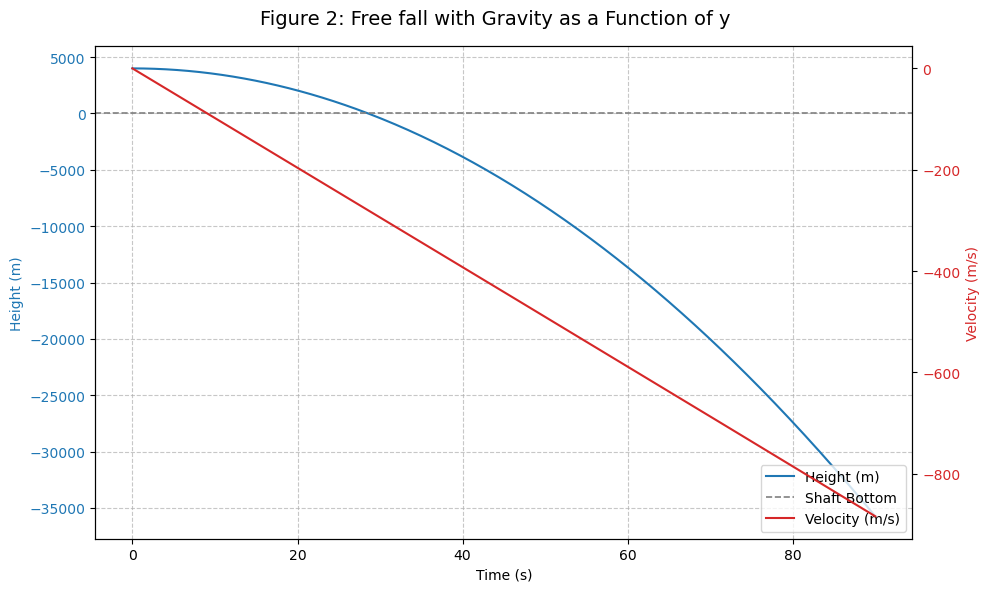

It reaches the bottom of the shaft at time 28.56 s with velocity -280.10 m/s.


In [95]:
#Problem 2: Part 1

# Constants
g = 9.81               # Surface gravity (m/s²)
R_earth = 6.371e6      # Radius of Earth (m)
shaft_depth = 4000     # Shaft depth (m)

# Event function to detect when height reaches 0 (shaft bottom)
def reach_shaft_bottom(t, S, a, z):
    return S[0]  # Y = 0 means bottom of the shaft

reach_shaft_bottom.terminal = False  # Non-terminal event
reach_shaft_bottom.direction = -1    # Detect only when crossing zero from above

# ODE system with gravity decreasing by height
def falling_object_withG(t, S, a, z):
    Y, Vy = S
    dYdt = Vy
    dVydt = -g * (1 - (Y / R_earth)) + a * (Vy**z)
    return [dYdt, dVydt]

# Initial conditions: starting from Earth's surface
S_0 = [4000, 0]

# Parameters
alpha = 0
lamb = 2
t_span = (0, 90)
t_eval = np.linspace(0, 90, 400)

# Solve the system with event detection
solution = solve_ivp(falling_object_withG, t_span, S_0, t_eval=t_eval,args=(alpha, lamb), events=reach_shaft_bottom)

# Extract results
time = solution.t
height = solution.y[0]
velocity = solution.y[1]

# Get time and velocity at shaft bottom
shaft_time = solution.t_events[0][0]
shaft_velocity = solve_ivp(falling_object_withG, [0, shaft_time], S_0,args=(alpha, lamb)).y[1, -1]

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))
fig.suptitle("Figure 2: Free fall with Gravity as a Function of y", fontsize=14)

# Left axis: Height
ax1.plot(time, height, color="tab:blue", label="Height (m)")
ax1.axhline(y=0, color="gray", linestyle="--", linewidth=1.2, label="Shaft Bottom")
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("Height (m)", color="tab:blue")
ax1.tick_params(axis="y", labelcolor="tab:blue")
ax1.grid(True, linestyle="--", alpha=0.7)

# Right axis: Velocity
ax2 = ax1.twinx()
ax2.plot(time, velocity, color="tab:red", label="Velocity (m/s)")
ax2.set_ylabel("Velocity (m/s)", color="tab:red")
ax2.tick_params(axis="y", labelcolor="tab:red")

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc="lower right")

plt.tight_layout()
plt.show()

# Print when the mass reaches the bottom of the shaft info
print(f"It reaches the bottom of the shaft at time {shaft_time:.2f} s with velocity {shaft_velocity:.2f} m/s.")


In [7]:
#Problem2. Part2 

# As after t=0, the height will be decreasing to be lower than the radius of the earth, so the gravity will be smaller as the mass falls down
#The lower the mass is, the lower gravity it will feel and the slower it will fall down, but this effect is almost negligable in a 80s time span 
# You would have to consider it for a bigger time span 

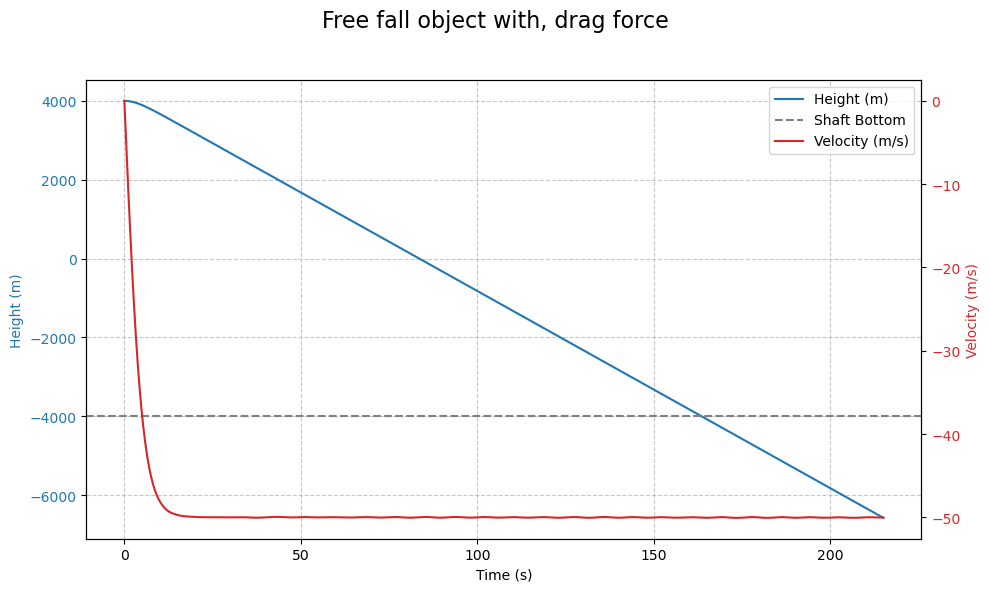

0.003924
It reaches the bottom of the shaft at time 83.55 s with velocity -280.10 m/s.


In [97]:
#Problem2 part.3

terminal_velocity=50#m/s
t_mass=1#kg 


def alpha_test_mass(m,v,g): #This function finds that alpha, using the terminal velocity of 50 m/s assuming we equate drag force to the weight, and solving for alpha
    return (m*g)/(v**2) 

new_alpha=alpha_test_mass(t_mass,terminal_velocity,g) 

new_alpha
lamb = 2
t_span = (0, 215)
t_eval = np.linspace(0, 215, 400)

# Solve the system 
solution = solve_ivp(falling_object_withG,t_span,S_0,t_eval=t_eval,args=(new_alpha, lamb),events=reach_shaft_bottom)
shaft_time_1 = solution.t_events[0][0]

# Extract results
time = solution.t
height = solution.y[0]
velocity = solution.y[1]

fig, ax1 = plt.subplots(figsize=(10, 6))
fig.suptitle("Free fall object with, drag force", fontsize=16)

# Primary y-axis for Height
ax1.plot(time, height, color="tab:blue", label="Height (m)")
ax1.axhline(-shaft_depth, color="gray", linestyle="--", label="Shaft Bottom")
ax1.set_ylabel("Height (m)", color="tab:blue")
ax1.tick_params(axis='y', labelcolor="tab:blue")
ax1.grid(True, linestyle="--", alpha=0.7)
ax1.set_xlabel("Time (s)")

# Secondary y-axis for Velocity
ax2 = ax1.twinx()
ax2.plot(time, velocity, color="tab:red", label="Velocity (m/s)")
ax2.set_ylabel("Velocity (m/s)", color="tab:red")
ax2.tick_params(axis='y', labelcolor="tab:red")

# Legends
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc="upper right")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

print(new_alpha)
print(f"It reaches the bottom of the shaft at time {shaft_time_1:.2f} s with velocity {shaft_velocity:.2f} m/s.")



In [9]:
#We see a max velocity of 50m/s, and on the y there is now a linear falling graph with slope -50 after some time bewteen 10 and 20s when it reaches the velocity of 50m/s

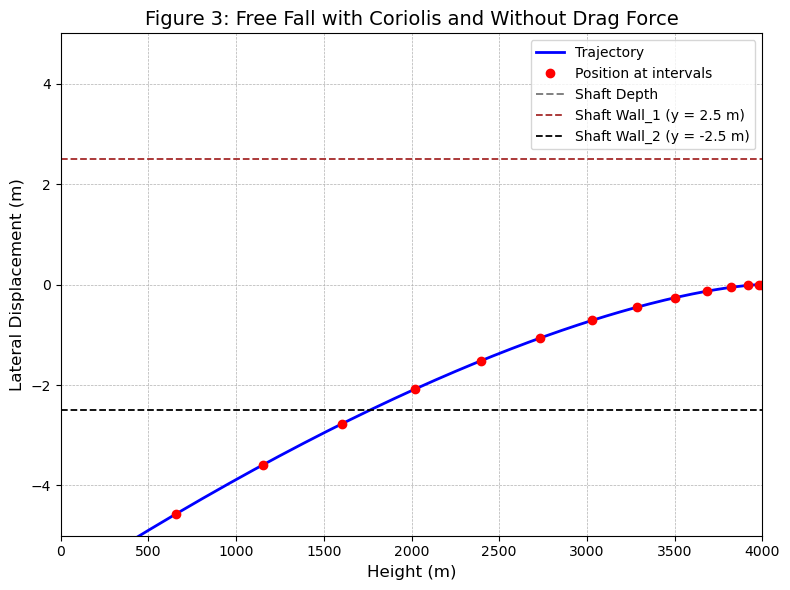

In [83]:
#Problem 3 part 1,2
earth_rotation= 7.85*(10**-5) # RAD/S 
#Extention of the equation
def falling_object_withG(t, S, a, z, u):
    Y, Vy, x, Vx = S
    dYdt = Vy
    dVydt = -g * (1+(Y/R_earth)) + a * (Vy**z) -2*u*Vx
    dXdt= Vx 
    dVxdt= 2*u*Vy
    return [dYdt, dVydt, dXdt,dVxdt]

#initial conditions 
S_0=[4000,0,0,0]  # h=0 Compared to the r_earth, Vy=0 starts from rest, X=0 center of the shaft, Vx=0 starts from %reset
alpha=0 
lamb= 2 
#Values of t into the ODE
t_span = (0, 50)
t_eval = np.linspace(0, 50, 250)

solution_2= solve_ivp(falling_object_withG,t_span,S_0,t_eval=t_eval,args=(alpha, lamb,earth_rotation))


time = solution_2.t
height = solution_2.y[0]
x_component = solution_2.y[2]


dot_indices = np.arange(0, len(time), 10)

# Plotting
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(height, x_component, linewidth=2, color='blue', label='Trajectory')
ax.plot(height[dot_indices], x_component[dot_indices], 'o', color='red', label='Position at intervals')

ax.set_title("Figure 3: Free Fall with Coriolis and Without Drag Force", fontsize=14)
ax.set_xlabel("Height (m)", fontsize=12)
ax.set_ylabel("Lateral Displacement (m)", fontsize=12)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Shaft depth marker
ax.axvline(0, color='grey', linewidth=1.4, linestyle='--', label='Shaft Depth')

# Shaft wall markers (horizontal lines)
ax.axhline(2.5, color='brown', linestyle='--', linewidth=1.3, label='Shaft Wall_1 (y = 2.5 m)')
ax.axhline(-2.5, color='black', linestyle='--', linewidth=1.3, label='Shaft Wall_2 (y = -2.5 m)')

# Axis limits
ax.set_xlim(0, 4000)  # Height range
ax.set_ylim(-5, 5)    # Shaft width

# Legend
ax.legend()

plt.tight_layout()
plt.show()

In [60]:
#Problem3 part 3 

#In the plot is clear that if we throw the test mass at the middle of the shaft, the mass will collide with  the wall as it will travel a distance of 2.5m well before the 4000m of height
#Even if we droped the mass from a point close to the west edge it will still hit the shaft well before reaching the depth of the shaft 


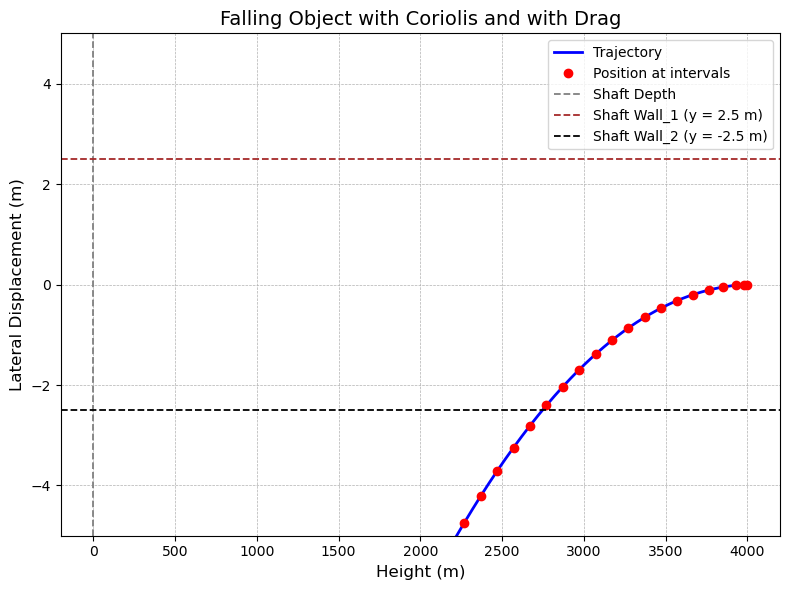

In [81]:
##Problem3 part 4 

#This will be the same, but with the new_alpha found in a problem before 
earth_rotation= 7.85*(10**-5) # RAD/S 

def falling_object_withG(t, S, a, z, u):
    Y, Vy, x, Vx = S
    dYdt = Vy
    dVydt = -g * (1+(Y/R_earth)) + a * (Vy**z) -2*u*Vx
    dXdt= Vx 
    dVxdt= 2*u*Vy
    return [dYdt, dVydt, dXdt,dVxdt]

#initial conditions 
S_0=[4000,0,0,0]  # h=0 Compared to the r_earth, Vy=0 starts from rest, X=0 center of the shaft, Vx=0 starts from %reset
new_alpha
lamb= 2 

t_span = (0, 50)
t_eval = np.linspace(0, 50, 250)

solution_2= solve_ivp(falling_object_withG,t_span,S_0,t_eval=t_eval,args=(new_alpha, lamb,earth_rotation))


time = solution_2.t
height = solution_2.y[0]
x_component = solution_2.y[2]


dot_indices = np.arange(0, len(time), 10)

# Plotting
fig, ax = plt.subplots(figsize=(8, 6))


ax.plot(height, x_component, linewidth=2, color='blue', label='Trajectory')
ax.plot(height[dot_indices], x_component[dot_indices], 'o', color='red', label='Position at intervals')

ax.set_title("Falling Object with Coriolis and with Drag", fontsize=14)
ax.set_xlabel("Height (m)", fontsize=12)
ax.set_ylabel("Lateral Displacement (m)", fontsize=12)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Shaft depth line 
ax.axvline(0, color='gray', linewidth=1.3, linestyle='--', label="Shaft Depth")

# Shaft wall markers 
ax.axhline(2.5, color='brown', linestyle='--', linewidth=1.3, label='Shaft Wall_1 (y = 2.5 m)')
ax.axhline(-2.5, color='black', linestyle='--', linewidth=1.3, label='Shaft Wall_2 (y = -2.5 m)')

# Set y-limits to show shaft width
ax.set_ylim(-5, 5)

# Legend
ax.legend()

plt.tight_layout()
plt.show()

In [13]:
#It does make a diference, IT HITS THE WALL FASTER! At arround 1750m into the depth of the shaft 

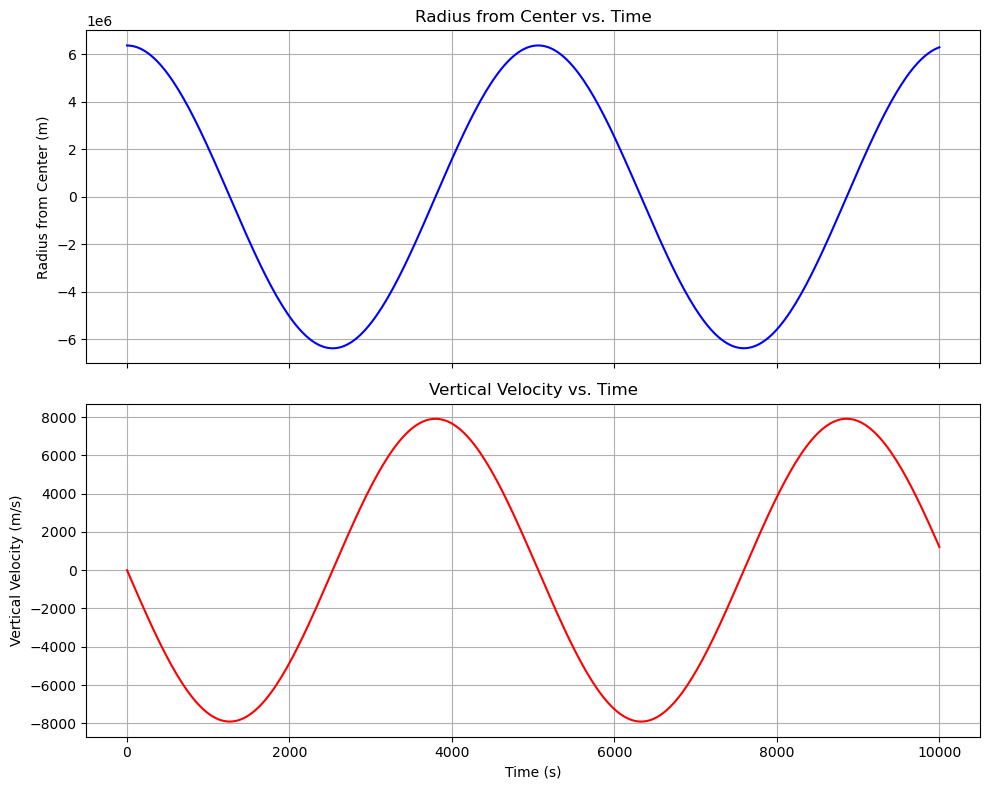

In [14]:
#Problem#4 part 1
def falling_object_withG(t, S, a, z):
    Y, Vy = S
    dYdt = Vy
    dVydt = -g * (Y/R_earth) + a * (Vy**z)
    return [dYdt, dVydt]
S_0=[R_earth,0]  # Starts north pole , Vy=0 starts from rest
alpha=0
lamb= 2 

t_span = (0, 10000)
t_eval = np.linspace(0, 10000, 300)

solution_3= solve_ivp(falling_object_withG,t_span,S_0,t_eval=t_eval,args=(alpha, lamb))

time = solution_3.t
height = solution_3.y[0]
V_y=solution_3.y[1] 



fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Height (radius from center) vs. Time
ax1.plot(time, height, color='blue')
ax1.set_ylabel("Radius from Center (m)")
ax1.set_title("Radius from Center vs. Time")
ax1.grid(True)

# Vertical Velocity vs. Time
ax2.plot(time, V_y, color='red')
ax2.set_xlabel("Time (s)")
ax2.set_ylabel("Vertical Velocity (m/s)")
ax2.set_title("Vertical Velocity vs. Time")
ax2.grid(True)

plt.tight_layout()
plt.show()


In [15]:
#Problem 4 part 2

# Constants
g = 9.81  # m/s^2
R_earth = 6.371e6  # meters
alpha = 0
lamb = 2

# Differential equation
def falling_object_withG(t, S, a, z):
    Y, Vy = S
    return [Vy, -g * (Y / R_earth) + a * (Vy**z)]

# Initial conditions
S_0 = [R_earth, 0]  # Starting at north pole, at rest

# Event: Crossing the Earth's center
def cross_center(t, S, a, z):
    Y, Vy = S
    return Y
cross_center.terminal = True
cross_center.direction = -1  # Falling through center

# Solve
solution = solve_ivp(falling_object_withG,(0, 4000),S_0,args=(alpha, lamb),events=[cross_center])

# Extract results directly
center_time = solution.t_events[0][0]
center_position, center_velocity = solution.y_events[0][0]



# Friendly output
print(f"\nThe object crosses the center of the Earth at {center_time:.2f} seconds.")
print(f"  At that moment, it's exactly at the center (Y = {center_position:.2f} m),")
print(f"  moving at {center_velocity:.2f} m/s toward the south pole.")


The object crosses the center of the Earth at 1265.77 seconds.
  At that moment, it's exactly at the center (Y = 0.00 m),
  moving at -7906.36 m/s toward the south pole.


In [16]:
#Problem 4 part 3
import numpy as np
from scipy.integrate import solve_ivp

# Constants
g = 9.81  # gravity in m/s^2
R_earth = 6.371e6  # radius of Earth in meters
alpha = 0  # drag coefficient
lamb = 2  # drag exponent

# Differential equation: motion through Earth
def falling_object_withG(t, S, a, z):
    Y, Vy = S
    dYdt = Vy
    dVydt = -g * (Y / R_earth) + a * (Vy**z)
    return [dYdt, dVydt]

# Initial conditions: start at north pole at rest
S_0 = [R_earth, 0]

# Event: detect when velocity goes from negative to positive (i.e., turning point at south pole)
def velocity_zero_south(t, S, a, z):
    Y, Vy = S
    return Vy
velocity_zero_south.terminal = True
velocity_zero_south.direction = 1  # only trigger when velocity goes from negative to positive

# Solve the ODE and detect event
solution_velocity_south = solve_ivp(falling_object_withG,(0, 6000),S_0,args=(alpha, lamb),events=velocity_zero_south,rtol=1e-12,atol=1e-12)

# Extract event information
velocity_zero_south_event = solution_velocity_south.t_events[0]
velocity_zero_south_time = velocity_zero_south_event[0] if len(velocity_zero_south_event) > 0 else None
velocity_zero_south_state = solution_velocity_south.y_events[0][0] if len(velocity_zero_south_event) > 0 else None

# Print result
print(f"""
South Pole Reached:
  - Time: {velocity_zero_south_time:.2f} seconds
  - Position: {velocity_zero_south_state[0]:.2f} m
  - Velocity: {velocity_zero_south_state[1]:.2e} m/s
""")


South Pole Reached:
  - Time: 2531.74 seconds
  - Position: -6371000.00 m
  - Velocity: 2.77e-13 m/s



In [17]:
#Problem 4. part 3 Object reaches center 

# Constants
g = 9.81
R_earth = 6.371e6
alpha = 0
lamb = 2

# ODE system
def falling_object_withG(t, S, a, z):
    Y, Vy = S
    return [Vy, -g * (Y / R_earth) + a * (Vy**z)]

# Initial conditions
S_0 = [R_earth, 0]

# Event: Crossing the center (Y = 0) while falling
def cross_center(t, S, a, z):
    Y, Vy = S
    return Y
cross_center.terminal = True
cross_center.direction = -1  # downward crossing only

# Solve with center event only
solution_center = solve_ivp(falling_object_withG,(0, 6000),S_0,args=(alpha, lamb),events=cross_center)

# Extract and print results
center_time = solution_center.t_events[0][0]
center_position, center_velocity = solution_center.y_events[0][0]

print(f"""
Center of Earth Crossed:
  - Time: {center_time:.2f} seconds
  - Position: {center_position:.2f} m
  - Velocity: {center_velocity:.2f} m/s
""")



Center of Earth Crossed:
  - Time: 1265.77 seconds
  - Position: 0.00 m
  - Velocity: -7906.36 m/s



In [18]:
#Problem 4, part 3
def orbital_velocity(G,M,R):
    return (G*M/R)**(1/2)

#now the time depends on the circunference of the earth 

def orbital_time(angle,R,v): 
    return (angle*R)/v

quarter_circunference=np.pi/2 
half_circunference=np.pi

pole_to_half_time= orbital_time(quarter_circunference,R_earth,orbital_velocity(G,M_earth,R_earth))
pole_to_half_time

pole_to_pole_time=orbital_time(half_circunference,R_earth,orbital_velocity(G,M_earth,R_earth))

pole_to_half_time,pole_to_pole_time

#Surprisningly its almost the same time for both result



(1265.2272100247212, 2530.4544200494424)

In [33]:
#Problem 5 part 1

G = 6.6743e-11  # Gravitational Constant (m^3/kg/s^2)
g= 9.81  # Gravitational Acceleration at the surface (m/s^2)
R_earth = 6378.1e3  # Radius of the Earth (m)

#Get the values of p_N 

n_values=[0,1,2,9]

# Recalculate rho_n using the actual Earth's radius
M_total_actual = (4/3) * np.pi * R_earth**3  # again assume rho_0 = 1 for base comparison

# Update the integral using the real radius of Earth
def integrand(r, n):
    return (1 - (r / R_earth)**2)**n * r**2

# Recompute rho_n for actual Earth radius
M_earth = 5.972e24  # kg

# Compute rho_n for real Earth mass
def compute_rho_n_real(n):
    integral_result, _ = quad(lambda r: (1 - (r / R_earth)**2)**n * r**2, 0, R_earth)
    return M_earth / (4 * np.pi * integral_result)

rho_n_values_real = {n: compute_rho_n_real(n) for n in n_values}



rho_n_values_real = {n: compute_rho_n_real(n) for n in n_values}
rho_n_values_real




{0: 5494.8674095512,
 1: 13737.168523878001,
 2: 24040.044916786497,
 9: 135545.12141863425}

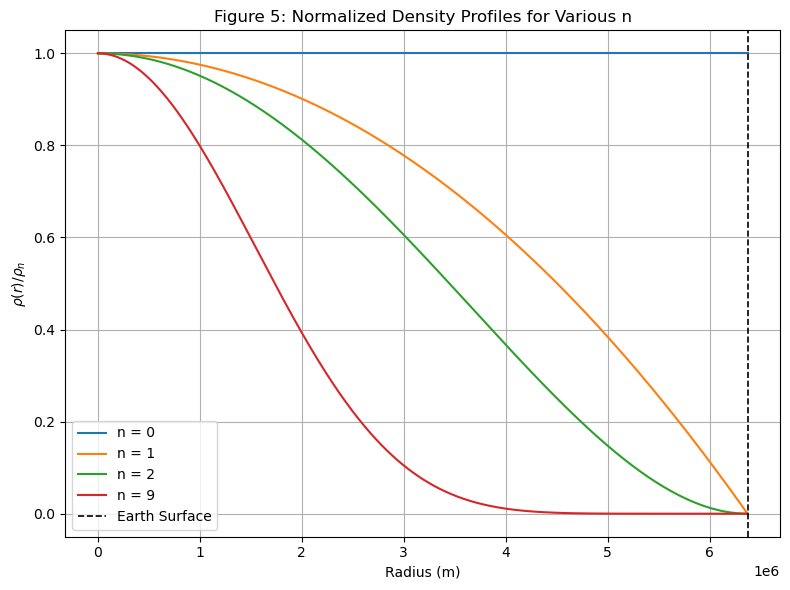

In [90]:
#Porblem 5, part 1 continuation

#Set p_n=1 



# Create a fine grid of radius values from 0 to R_earth
r_values = np.linspace(0, R_earth, 500)

# Compute normalized density profiles for each n
# Create figure and axis using the OO API


# Plot normalized density profiles
fig, ax = plt.subplots(figsize=(8, 6))

# Plot normalized density profiles
for n in n_values:
    rho_profile = (1 - (r_values / R_earth)**2)**n
    ax.plot(r_values, rho_profile, label=f'n = {n}')

# Add Earth surface line
ax.axvline(R_earth, color='black', linestyle='--', linewidth=1.2, label='Earth Surface')

# Customize plot
ax.set_xlabel('Radius (m)')
ax.set_ylabel(r'$\rho(r)/\rho_n$')
ax.set_title('Figure 5: Normalized Density Profiles for Various n')
ax.legend()
ax.grid(True)

# Layout adjustment and display
fig.tight_layout()
plt.show()

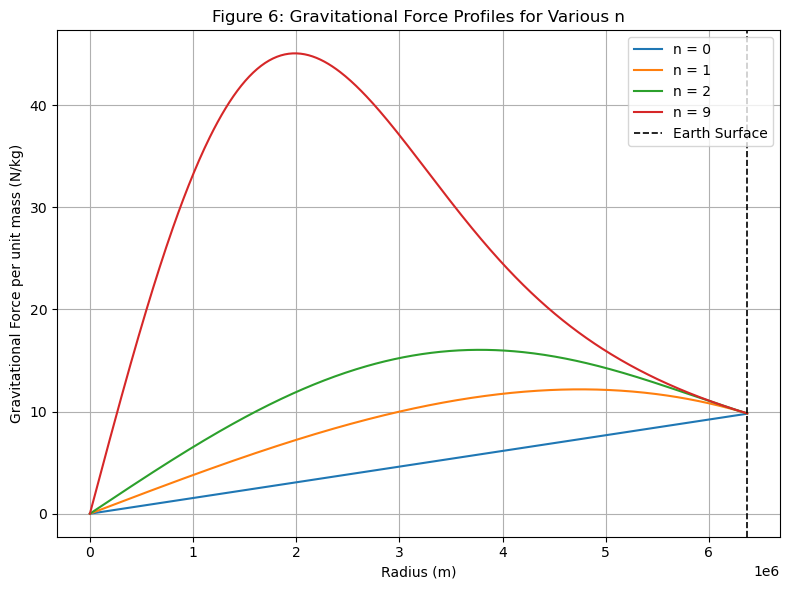

In [91]:
#Problem 5, part 2 

# Function to compute enclosed mass within radius r for a given n
# Create figure and axis using the OO API
fig, ax = plt.subplots(figsize=(8, 6))

# Plot gravitational force for each n
for n in n_values:
    forces = []
    for r in r_values:
        if r == 0:
            forces.append(0)
        else:
            m_enc = enclosed_mass(r, n)
            F = G * m_enc / r**2  # Force per unit mass
            forces.append(F)
    ax.plot(r_values, forces, label=f'n = {n}')

# Add vertical line at Earth's surface
ax.axvline(R_earth, color='black', linestyle='--', linewidth=1.2, label='Earth Surface')

# Customize plot
ax.set_xlabel('Radius (m)')
ax.set_ylabel('Gravitational Force per unit mass (N/kg)')
ax.set_title('Figure 6: Gravitational Force Profiles for Various n')
ax.legend()
ax.grid(True)

# Layout adjustment and display
fig.tight_layout()
plt.show()


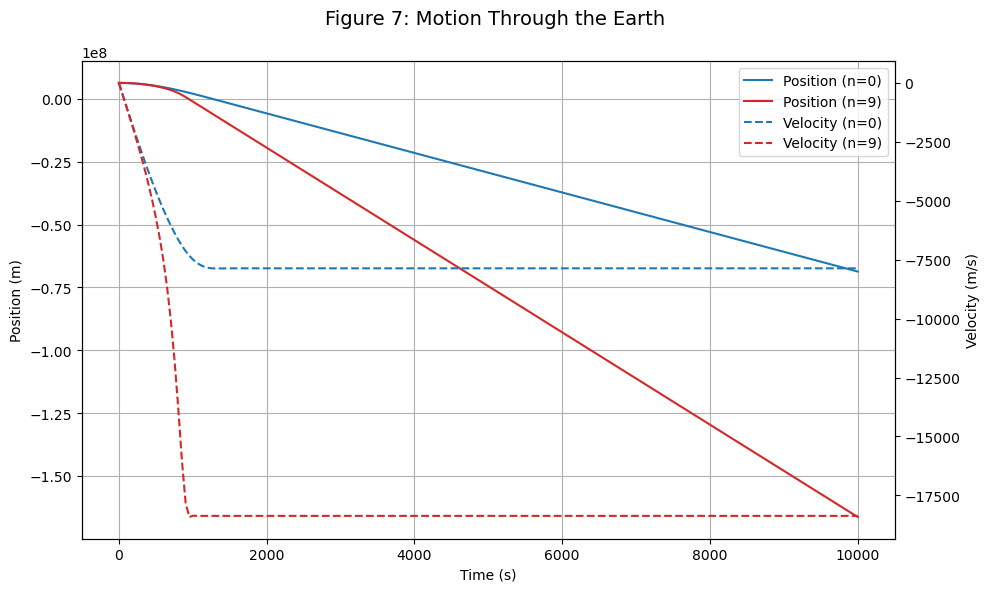

In [86]:
#Problem 5, part 3

# Constants
G = 6.6743e-11  # Gravitational constant
R = 6378.1e3    # Earth's radius in meters
M_earth = 5.972e24  # kg

# Sample enclosed mass function (replace with your actual function)
def enclosed_mass(r, n):
    integral, _ = quad(lambda x: (1 - (x/R)**2)**n * x**2, 0, r)
    rho_n = rho_n_values_real[n]
    return 4 * np.pi * rho_n * integral

# Differential equation system
def falling_withdensity(t, S, n): 
    y, Vy = S 
    dydt = Vy
    if y <= 0:
        dVydt = 0  # avoid singularity at the center
    else:
        m_enc = enclosed_mass(y, n)
        dVydt = -G * m_enc / y**2
    return [dydt, dVydt]

# Set up the figure and axes
# Set up the figure and axes
fig, ax_pos = plt.subplots(figsize=(10, 6))
fig.suptitle('Figure 7: Motion Through the Earth', fontsize=14)
ax_vel = ax_pos.twinx()

# Initial conditions and time span
y0 = [R, 0]
t_span = (0, 10000)
t_eval = np.linspace(0, 10000, 200)

# Color map
colors = {0: 'tab:blue', 9: 'tab:red'}

# Plot both n = 0 and n = 9
for n in [0, 9]:
    sol = solve_ivp(falling_withdensity, t_span, y0, t_eval=t_eval, args=(n,))
    t = sol.t
    y = sol.y[0]  # Position in Mm
    v = sol.y[1]        # Velocity in m/s

    ax_pos.plot(t, y, color=colors[n], linestyle='-', label=f'Position (n={n})')
    ax_vel.plot(t, v, color=colors[n], linestyle='--', label=f'Velocity (n={n})')

# Axis labels
ax_pos.set_xlabel('Time (s)')
ax_pos.set_ylabel('Position (m)')
ax_vel.set_ylabel('Velocity (m/s)')

# Grid and layout
ax_pos.grid(True)

# Combine and show legend
lines_pos, labels_pos = ax_pos.get_legend_handles_labels()
lines_vel, labels_vel = ax_vel.get_legend_handles_labels()
ax_pos.legend(lines_pos + lines_vel, labels_pos + labels_vel, loc='upper right')

fig.tight_layout()
plt.show()



In [23]:
#Problem 5, part 4
def hit_center(t, S,n):
    return S[0]
hit_center.terminal = True
hit_center.direction = -1

# Initial conditions and time span
y0 = [R, 0]
t_span = (0, 96000)

# Loop through each n value and print results
for n in n_values:
    sol = solve_ivp(
        falling_withdensity, t_span, y0,
        args=(n,), events=hit_center,)

    time_to_center = sol.t_events[0][0]
    velocity_at_center = sol.y_events[0][0][1]

    print(f"n = {n}: Time to center = {time_to_center:.2f} s, Velocity at center = {velocity_at_center:.2f} m/s")

n = 0: Time to center = 1267.94 s, Velocity at center = -7869.31 m/s
n = 1: Time to center = 1096.47 s, Velocity at center = -10479.44 m/s
n = 2: Time to center = 1035.13 s, Velocity at center = -12247.93 m/s
n = 9: Time to center = 943.75 s, Velocity at center = -18392.13 m/s


In [98]:
#Problem 6 Part 1
#Since ther eis no drag force, nor coriolis , we just calculate the value using the harmonic oscilation time we get a time of 1624.60 


In [99]:
#Problem 6 Part 2
# Here we divide the densities of the earth by that of the moon to get the ratio
# Again this was done in paper and the result is the Moon is about 61% as dense as Earth.

#Density is just equal to Mass/Volume Then divide Mass/volume of earth by Mass/volume of Moon, this gives the result presented



In [100]:
#Problem 6 part 3 
#This one is a bit more tricky and we have to use the time given by the harmonic oscilator equation. 
#Here we will have the time  inversly proportional to the square root of the mass, if we change the mass by the density this gives us the result 
#The time is inversly proportional to the square root of the density